In [1]:
import dolfin as dl
import scipy.io as sp
import numpy as np
import ufl
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mat4py import loadmat
import mat4py as m4p
import sys
import os
sys.path.append( os.environ.get('HIPPYLIB_BASE_DIR', "../") )
from hippylib import *
sys.path.append( os.environ.get('HIPPYLIB_BASE_DIR', "..") + "/applications/ad_diff/" )
from model_ad_diff import TimeDependentAD, SpaceTimePointwiseStateObservation

import logging
logging.getLogger('FFC').setLevel(logging.WARNING)
logging.getLogger('UFL').setLevel(logging.WARNING)
dl.set_log_active(False)

In [2]:
def v_boundary(x,on_boundary):
    return on_boundary

def q_boundary(x,on_boundary):
    return x[0] < dl.DOLFIN_EPS and x[1] < dl.DOLFIN_EPS
        
def computeVelocityField(mesh):
    Xh = dl.VectorFunctionSpace(mesh,'Lagrange', 2)
    Wh = dl.FunctionSpace(mesh, 'Lagrange', 1)
    mixed_element = ufl.MixedElement([Xh.ufl_element(), Wh.ufl_element()])
    XW = dl.FunctionSpace(mesh, mixed_element)

    Re = dl.Constant(1e2)
    
    g = dl.Expression(('0.0','(x[0] < 1e-14) - (x[0] > 1 - 1e-14)'), degree=1)
    bc1 = dl.DirichletBC(XW.sub(0), g, v_boundary)
    bc2 = dl.DirichletBC(XW.sub(1), dl.Constant(0), q_boundary, 'pointwise')
    bcs = [bc1, bc2]
    
    vq = dl.Function(XW)
    (v,q) = ufl.split(vq)
    (v_test, q_test) = dl.TestFunctions (XW)
    
    def strain(v):
        return ufl.sym(ufl.grad(v))
    
    F = ( (2./Re)*ufl.inner(strain(v),strain(v_test))+ ufl.inner (ufl.nabla_grad(v)*v, v_test)
           - (q * ufl.div(v_test)) + ( ufl.div(v) * q_test) ) * ufl.dx
           
    dl.solve(F == 0, vq, bcs, solver_parameters={"newton_solver":
                                         {"relative_tolerance":1e-4, "maximum_iterations":100}})
    
    plt.figure(figsize=(15,5))
    vh = dl.project(v,Xh)
    qh = dl.project(q,Wh)
    nb.plot(nb.coarsen_v(vh), subplot_loc=121,mytitle="Velocity")
    nb.plot(qh, subplot_loc=122,mytitle="Pressure")
    plt.show()
        
    return v

In [3]:
mesh = dl.refine( dl.Mesh("dolfin_fine.xml") )
#wind_velocity = computeVelocityField(mesh)
Vh = dl.FunctionSpace(mesh, "Lagrange", 1)
print( "Number of dofs: {0}".format( Vh.dim() ) )

Number of dofs: 11136


In [4]:
mesh=dl.Mesh("dolfin_fine.xml")

Vh = dl.FunctionSpace(mesh, "Lagrange", 1)
print( "Number of dofs: {0}".format( Vh.dim() ) )

Number of dofs: 2868


In [17]:
#LOADING THE .MAT FILE CONTAINING THE RESULT

result_predicted_left_1 = loadmat('INITIAL_CONDITION_rMAP_1.mat') #PREDICTED BY RANDOMIZED METHOD
result_predicted_left_2 = loadmat('INITIAL_CONDITION_rMAP_2.mat') #PREDICTED BY RANDOMIZED METHOD            # MAP SOLUTION

y_predicted_rMAP_1=np.array(list(result_predicted_rMAP_1.values()))[-1].squeeze(-1)
y_predicted_rMAP_2=np.array(list(result_predicted_left_2.values()))[-1].squeeze(-1)

y_original=np.array(list(result_original.values()))[-1].squeeze(-1)
y_MAP=np.array(list(result_MAP.values()))[-1].squeeze(-1)

#PLOTTING THE RESULTS OF RANDOMIZED VS MAP SOLUTION

ic_expr = dl.Expression(
    'std::min(0.5,std::exp(-100*(std::pow(x[0]-0.35,2) +  std::pow(x[1]-0.7,2))))',
    element=Vh.ufl_element())
true_initial_condition = dl.interpolate(ic_expr, Vh).vector()

true_initial_condition_predicted_left_1=0*true_initial_condition
true_initial_condition_predicted_left_2=0*true_initial_condition
true_initial_condition_predicted_left_3=0*true_initial_condition
true_initial_condition_predicted_left_4=0*true_initial_condition
true_initial_condition_predicted_left_5=0*true_initial_condition
true_initial_condition_predicted_left_6=0*true_initial_condition

true_initial_condition_original=0*true_initial_condition
true_initial_condition_MAP=0*true_initial_condition

for i in range(0,len(true_initial_condition)):
    
    true_initial_condition_predicted_left_1[i]= y_predicted_left_1[i]
    true_initial_condition_predicted_left_2[i]= y_predicted_left_2[i]
    true_initial_condition_predicted_left_3[i]= y_predicted_left_3[i]
    true_initial_condition_predicted_left_4[i]= y_predicted_left_4[i]
    true_initial_condition_predicted_left_5[i]= y_predicted_left_5[i]
    true_initial_condition_predicted_left_6[i]= y_predicted_left_6[i]
    
    true_initial_condition_original[i]=y_original[i]
    true_initial_condition_MAP[i]=y_MAP[i]

#LOADING THE .MAT FILE CONTAINING THE RESULT

result_predicted_left_1 = loadmat('INITIAL_CONDITION_LEFT_1.mat') #PREDICTED BY RANDOMIZED METHOD
result_predicted_left_2 = loadmat('INITIAL_CONDITION_LEFT_2.mat') #PREDICTED BY RANDOMIZED METHOD
result_predicted_left_3 = loadmat('INITIAL_CONDITION_LEFT_3.mat') #PREDICTED BY RANDOMIZED METHOD
result_predicted_left_4 = loadmat('INITIAL_CONDITION_LEFT_4.mat') #PREDICTED BY RANDOMIZED METHOD
result_predicted_left_5 = loadmat('INITIAL_CONDITION_LEFT_5.mat') #PREDICTED BY RANDOMIZED METHOD
result_predicted_left_6 = loadmat('INITIAL_CONDITION_LEFT_6.mat') #PREDICTED BY RANDOMIZED METHOD
result_original= loadmat('INITIAL_CONDITION_ORIGINAL.mat')    # ORIGINAL TRUE SOLUTION
result_MAP= loadmat('INITIAL_CONDITION_MAP_u1.mat')              # MAP SOLUTION

y_predicted_left_1=np.array(list(result_predicted_left_1.values()))[-1].squeeze(-1)
y_predicted_left_2=np.array(list(result_predicted_left_2.values()))[-1].squeeze(-1)
y_predicted_left_3=np.array(list(result_predicted_left_3.values()))[-1].squeeze(-1)
y_predicted_left_4=np.array(list(result_predicted_left_4.values()))[-1].squeeze(-1)
y_predicted_left_5=np.array(list(result_predicted_left_5.values()))[-1].squeeze(-1)
y_predicted_left_6=np.array(list(result_predicted_left_6.values()))[-1].squeeze(-1)

y_original=np.array(list(result_original.values()))[-1].squeeze(-1)
y_MAP=np.array(list(result_MAP.values()))[-1].squeeze(-1)

#PLOTTING THE RESULTS OF RANDOMIZED VS MAP SOLUTION

ic_expr = dl.Expression(
    'std::min(0.5,std::exp(-100*(std::pow(x[0]-0.35,2) +  std::pow(x[1]-0.7,2))))',
    element=Vh.ufl_element())
true_initial_condition = dl.interpolate(ic_expr, Vh).vector()

true_initial_condition_predicted_left_1=0*true_initial_condition
true_initial_condition_predicted_left_2=0*true_initial_condition
true_initial_condition_predicted_left_3=0*true_initial_condition
true_initial_condition_predicted_left_4=0*true_initial_condition
true_initial_condition_predicted_left_5=0*true_initial_condition
true_initial_condition_predicted_left_6=0*true_initial_condition

true_initial_condition_original=0*true_initial_condition
true_initial_condition_MAP=0*true_initial_condition

for i in range(0,len(true_initial_condition)):
    
    true_initial_condition_predicted_left_1[i]= y_predicted_left_1[i]
    true_initial_condition_predicted_left_2[i]= y_predicted_left_2[i]
    true_initial_condition_predicted_left_3[i]= y_predicted_left_3[i]
    true_initial_condition_predicted_left_4[i]= y_predicted_left_4[i]
    true_initial_condition_predicted_left_5[i]= y_predicted_left_5[i]
    true_initial_condition_predicted_left_6[i]= y_predicted_left_6[i]
    
    true_initial_condition_original[i]=y_original[i]
    true_initial_condition_MAP[i]=y_MAP[i]



In [18]:
#LOADING THE .MAT FILE CONTAINING THE RESULT

result_predicted_rMAP_1 = loadmat('INITIAL_CONDITION_rMAP_1.mat') #PREDICTED BY RANDOMIZED METHOD
result_predicted_rMAP_2 = loadmat('INITIAL_CONDITION_rMAP_2.mat') #PREDICTED BY RANDOMIZED METHOD            # MAP SOLUTION

y_predicted_rMAP_1=np.array(list(result_predicted_rMAP_1.values()))[-1].squeeze(-1)
y_predicted_rMAP_2=np.array(list(result_predicted_rMAP_2.values()))[-1].squeeze(-1)

y_original=np.array(list(result_original.values()))[-1].squeeze(-1)
y_MAP=np.array(list(result_MAP.values()))[-1].squeeze(-1)

#PLOTTING THE RESULTS OF RANDOMIZED VS MAP SOLUTION

ic_expr = dl.Expression(
    'std::min(0.5,std::exp(-100*(std::pow(x[0]-0.35,2) +  std::pow(x[1]-0.7,2))))',
    element=Vh.ufl_element())
true_initial_condition = dl.interpolate(ic_expr, Vh).vector()

true_initial_condition_predicted_rMAP_1=0*true_initial_condition
true_initial_condition_predicted_rMAP_2=0*true_initial_condition

true_initial_condition_original=0*true_initial_condition
true_initial_condition_MAP=0*true_initial_condition

for i in range(0,len(true_initial_condition)):
    
    true_initial_condition_predicted_rMAP_1[i]= y_predicted_rMAP_1[i]
    true_initial_condition_predicted_rMAP_2[i]= y_predicted_rMAP_2[i]
    
    true_initial_condition_original[i]=y_original[i]
    true_initial_condition_MAP[i]=y_MAP[i]

#LOADING THE .MAT FILE CONTAINING THE RESULT

result_predicted_rMAP_1 = loadmat('INITIAL_CONDITION_rMAP_1.mat') #PREDICTED BY RANDOMIZED METHOD
result_predicted_rMAP_2 = loadmat('INITIAL_CONDITION_rMAP_2.mat') #PREDICTED BY RANDOMIZED METHOD

y_predicted_rMAP_1=np.array(list(result_predicted_rMAP_1.values()))[-1].squeeze(-1)
y_predicted_rMAP_2=np.array(list(result_predicted_rMAP_2.values()))[-1].squeeze(-1)

#PLOTTING THE RESULTS OF RANDOMIZED VS MAP SOLUTION

ic_expr = dl.Expression(
    'std::min(0.5,std::exp(-100*(std::pow(x[0]-0.35,2) +  std::pow(x[1]-0.7,2))))',
    element=Vh.ufl_element())
true_initial_condition = dl.interpolate(ic_expr, Vh).vector()

true_initial_condition_predicted_rMAP_1=0*true_initial_condition
true_initial_condition_predicted_rMAP_2=0*true_initial_condition

for i in range(0,len(true_initial_condition)):
    
    true_initial_condition_predicted_rMAP_1[i]= y_predicted_rMAP_1[i]
    true_initial_condition_predicted_rMAP_2[i]= y_predicted_rMAP_2[i]


In [19]:
#LOADING THE .MAT FILE CONTAINING THE RESULT

result_predicted_RIGHT_1 = loadmat('INITIAL_CONDITION_RIGHT_1.mat') #PREDICTED BY RANDOMIZED METHOD
result_predicted_RIGHT_2 = loadmat('INITIAL_CONDITION_RIGHT_2.mat') #PREDICTED BY RANDOMIZED METHOD
result_predicted_RIGHT_3 = loadmat('INITIAL_CONDITION_RIGHT_3.mat') #PREDICTED BY RANDOMIZED METHOD
result_predicted_RIGHT_4 = loadmat('INITIAL_CONDITION_RIGHT_4.mat') #PREDICTED BY RANDOMIZED METHOD
result_predicted_RIGHT_5 = loadmat('INITIAL_CONDITION_RIGHT_5.mat') #PREDICTED BY RANDOMIZED METHOD
result_predicted_RIGHT_6 = loadmat('INITIAL_CONDITION_RIGHT_6.mat') #PREDICTED BY RANDOMIZED METHOD
result_original= loadmat('INITIAL_CONDITION_ORIGINAL.mat')    # ORIGINAL TRUE SOLUTION
result_MAP= loadmat('INITIAL_CONDITION_MAP_u1.mat')              # MAP SOLUTION

y_predicted_RIGHT_1=np.array(list(result_predicted_RIGHT_1.values()))[-1].squeeze(-1)
y_predicted_RIGHT_2=np.array(list(result_predicted_RIGHT_2.values()))[-1].squeeze(-1)
y_predicted_RIGHT_3=np.array(list(result_predicted_RIGHT_3.values()))[-1].squeeze(-1)
y_predicted_RIGHT_4=np.array(list(result_predicted_RIGHT_4.values()))[-1].squeeze(-1)
y_predicted_RIGHT_5=np.array(list(result_predicted_RIGHT_5.values()))[-1].squeeze(-1)
y_predicted_RIGHT_6=np.array(list(result_predicted_RIGHT_6.values()))[-1].squeeze(-1)

y_original=np.array(list(result_original.values()))[-1].squeeze(-1)
y_MAP=np.array(list(result_MAP.values()))[-1].squeeze(-1)

#PLOTTING THE RESULTS OF RANDOMIZED VS MAP SOLUTION

ic_expr = dl.Expression(
    'std::min(0.5,std::exp(-100*(std::pow(x[0]-0.35,2) +  std::pow(x[1]-0.7,2))))',
    element=Vh.ufl_element())
true_initial_condition = dl.interpolate(ic_expr, Vh).vector()

true_initial_condition_predicted_RIGHT_1=0*true_initial_condition
true_initial_condition_predicted_RIGHT_2=0*true_initial_condition
true_initial_condition_predicted_RIGHT_3=0*true_initial_condition
true_initial_condition_predicted_RIGHT_4=0*true_initial_condition
true_initial_condition_predicted_RIGHT_5=0*true_initial_condition
true_initial_condition_predicted_RIGHT_6=0*true_initial_condition

true_initial_condition_original=0*true_initial_condition
true_initial_condition_MAP=0*true_initial_condition

for i in range(0,len(true_initial_condition)):
    
    true_initial_condition_predicted_RIGHT_1[i]= y_predicted_RIGHT_1[i]
    true_initial_condition_predicted_RIGHT_2[i]= y_predicted_RIGHT_2[i]
    true_initial_condition_predicted_RIGHT_3[i]= y_predicted_RIGHT_3[i]
    true_initial_condition_predicted_RIGHT_4[i]= y_predicted_RIGHT_4[i]
    true_initial_condition_predicted_RIGHT_5[i]= y_predicted_RIGHT_5[i]
    true_initial_condition_predicted_RIGHT_6[i]= y_predicted_RIGHT_6[i]
    
    true_initial_condition_original[i]=y_original[i]
    true_initial_condition_MAP[i]=y_MAP[i]



In [20]:
#LOADING THE .MAT FILE CONTAINING THE RESULT

result_predicted_RAM_1 = loadmat('INITIAL_CONDITION_RAM_1.mat') #PREDICTED BY RANDOMIZED METHOD
result_predicted_RAM_2 = loadmat('INITIAL_CONDITION_RAM_2.mat') #PREDICTED BY RANDOMIZED METHOD
result_predicted_RAM_3 = loadmat('INITIAL_CONDITION_RAM_3.mat') #PREDICTED BY RANDOMIZED METHOD
result_predicted_RAM_4 = loadmat('INITIAL_CONDITION_RAM_4.mat') #PREDICTED BY RANDOMIZED METHOD
result_predicted_RAM_5 = loadmat('INITIAL_CONDITION_RAM_5.mat') #PREDICTED BY RANDOMIZED METHOD
result_predicted_RAM_6 = loadmat('INITIAL_CONDITION_RAM_6.mat') #PREDICTED BY RANDOMIZED METHOD
result_original= loadmat('INITIAL_CONDITION_ORIGINAL.mat')    # ORIGINAL TRUE SOLUTION
result_MAP= loadmat('INITIAL_CONDITION_MAP_u1.mat')              # MAP SOLUTION

y_predicted_RAM_1=np.array(list(result_predicted_RAM_1.values()))[-1].squeeze(-1)
y_predicted_RAM_2=np.array(list(result_predicted_RAM_2.values()))[-1].squeeze(-1)
y_predicted_RAM_3=np.array(list(result_predicted_RAM_3.values()))[-1].squeeze(-1)
y_predicted_RAM_4=np.array(list(result_predicted_RAM_4.values()))[-1].squeeze(-1)
y_predicted_RAM_5=np.array(list(result_predicted_RAM_5.values()))[-1].squeeze(-1)
y_predicted_RAM_6=np.array(list(result_predicted_RAM_6.values()))[-1].squeeze(-1)

y_original=np.array(list(result_original.values()))[-1].squeeze(-1)
y_MAP=np.array(list(result_MAP.values()))[-1].squeeze(-1)

#PLOTTING THE RESULTS OF RANDOMIZED VS MAP SOLUTION

ic_expr = dl.Expression(
    'std::min(0.5,std::exp(-100*(std::pow(x[0]-0.35,2) +  std::pow(x[1]-0.7,2))))',
    element=Vh.ufl_element())
true_initial_condition = dl.interpolate(ic_expr, Vh).vector()

true_initial_condition_predicted_RAM_1=0*true_initial_condition
true_initial_condition_predicted_RAM_2=0*true_initial_condition
true_initial_condition_predicted_RAM_3=0*true_initial_condition
true_initial_condition_predicted_RAM_4=0*true_initial_condition
true_initial_condition_predicted_RAM_5=0*true_initial_condition
true_initial_condition_predicted_RAM_6=0*true_initial_condition

true_initial_condition_original=0*true_initial_condition
true_initial_condition_MAP=0*true_initial_condition

for i in range(0,len(true_initial_condition)):
    
    true_initial_condition_predicted_RAM_1[i]= y_predicted_RAM_1[i]
    true_initial_condition_predicted_RAM_2[i]= y_predicted_RAM_2[i]
    true_initial_condition_predicted_RAM_3[i]= y_predicted_RAM_3[i]
    true_initial_condition_predicted_RAM_4[i]= y_predicted_RAM_4[i]
    true_initial_condition_predicted_RAM_5[i]= y_predicted_RAM_5[i]
    true_initial_condition_predicted_RAM_6[i]= y_predicted_RAM_6[i]
    true_initial_condition_original[i]=y_original[i]
    true_initial_condition_MAP[i]=y_MAP[i]



In [21]:
#LOADING THE .MAT FILE CONTAINING THE RESULT

result_predicted_EnKF_1 = loadmat('INITIAL_CONDITION_EnKF_1.mat') #PREDICTED BY RANDOMIZED METHOD
result_predicted_EnKF_2 = loadmat('INITIAL_CONDITION_EnKF_2.mat') #PREDICTED BY RANDOMIZED METHOD
result_predicted_EnKF_3 = loadmat('INITIAL_CONDITION_EnKF_3.mat') #PREDICTED BY RANDOMIZED METHOD
result_predicted_EnKF_4 = loadmat('INITIAL_CONDITION_EnKF_4.mat') #PREDICTED BY RANDOMIZED METHOD
result_predicted_EnKF_5 = loadmat('INITIAL_CONDITION_EnKF_5.mat') #PREDICTED BY RANDOMIZED METHOD
result_predicted_EnKF_6 = loadmat('INITIAL_CONDITION_EnKF_6.mat') #PREDICTED BY RANDOMIZED METHOD
result_original= loadmat('INITIAL_CONDITION_ORIGINAL.mat')    # ORIGINAL TRUE SOLUTION
result_MAP= loadmat('INITIAL_CONDITION_MAP_u1.mat')              # MAP SOLUTION

y_predicted_EnKF_1=np.array(list(result_predicted_EnKF_1.values()))[-1].squeeze(-1)
y_predicted_EnKF_2=np.array(list(result_predicted_EnKF_2.values()))[-1].squeeze(-1)
y_predicted_EnKF_3=np.array(list(result_predicted_EnKF_3.values()))[-1].squeeze(-1)
y_predicted_EnKF_4=np.array(list(result_predicted_EnKF_4.values()))[-1].squeeze(-1)
y_predicted_EnKF_5=np.array(list(result_predicted_EnKF_5.values()))[-1].squeeze(-1)
y_predicted_EnKF_6=np.array(list(result_predicted_EnKF_6.values()))[-1].squeeze(-1)

y_original=np.array(list(result_original.values()))[-1].squeeze(-1)
y_MAP=np.array(list(result_MAP.values()))[-1].squeeze(-1)

#PLOTTING THE RESULTS OF RANDOMIZED VS MAP SOLUTION

ic_expr = dl.Expression(
    'std::min(0.5,std::exp(-100*(std::pow(x[0]-0.35,2) +  std::pow(x[1]-0.7,2))))',
    element=Vh.ufl_element())
true_initial_condition = dl.interpolate(ic_expr, Vh).vector()

true_initial_condition_predicted_EnKF_1=0*true_initial_condition
true_initial_condition_predicted_EnKF_2=0*true_initial_condition
true_initial_condition_predicted_EnKF_3=0*true_initial_condition
true_initial_condition_predicted_EnKF_4=0*true_initial_condition
true_initial_condition_predicted_EnKF_5=0*true_initial_condition
true_initial_condition_predicted_EnKF_6=0*true_initial_condition

true_initial_condition_original=0*true_initial_condition
true_initial_condition_MAP=0*true_initial_condition

for i in range(0,len(true_initial_condition)):
    
    true_initial_condition_predicted_EnKF_1[i]= y_predicted_EnKF_1[i]
    true_initial_condition_predicted_EnKF_2[i]= y_predicted_EnKF_2[i]
    true_initial_condition_predicted_EnKF_3[i]= y_predicted_EnKF_3[i]
    true_initial_condition_predicted_EnKF_4[i]= y_predicted_EnKF_4[i]
    true_initial_condition_predicted_EnKF_5[i]= y_predicted_EnKF_5[i]
    true_initial_condition_predicted_EnKF_6[i]= y_predicted_EnKF_6[i]
    true_initial_condition_original[i]=y_original[i]
    true_initial_condition_MAP[i]=y_MAP[i]



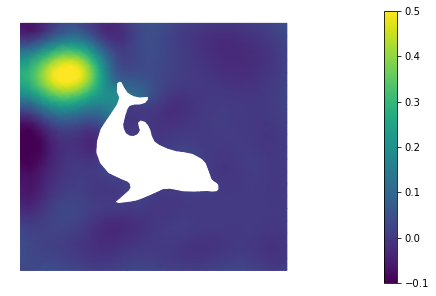

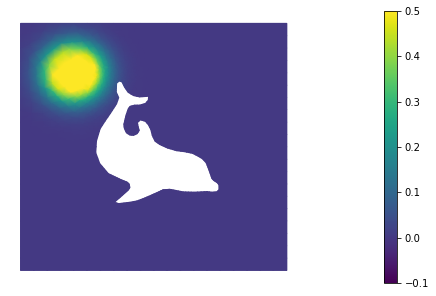

In [16]:
#COMPARING MAP SOLUTION WITH RANDOMIZED SOLUTION
objs = [dl.Function(Vh,true_initial_condition_MAP)]
mytitles = ['']; nb.multi1_plot(objs, mytitles,vmin = -0.1, vmax = 0.5); 
plt.savefig('Dophin_u_1.pdf')

objs = [dl.Function(Vh,true_initial_condition_original)]
mytitles = ['']; nb.multi1_plot(objs, mytitles,vmin = -0.1, vmax = 0.5); 
plt.savefig('Dophin_true.pdf')


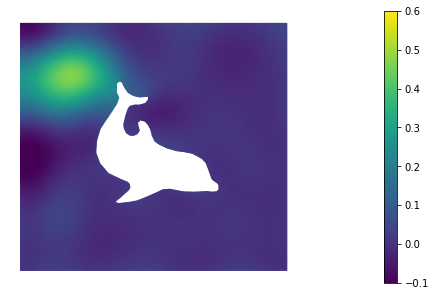

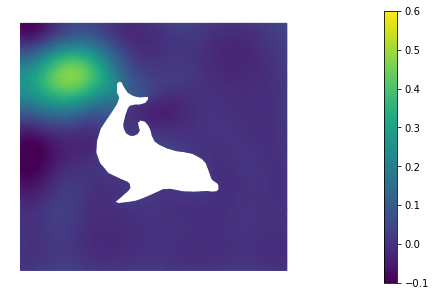

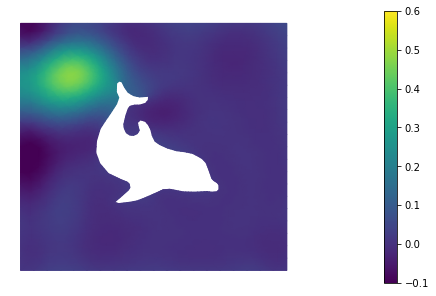

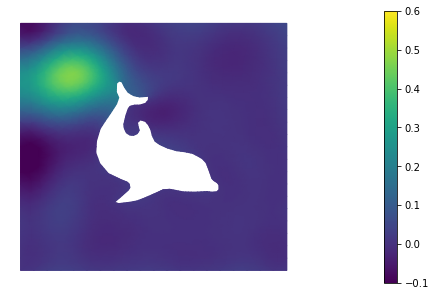

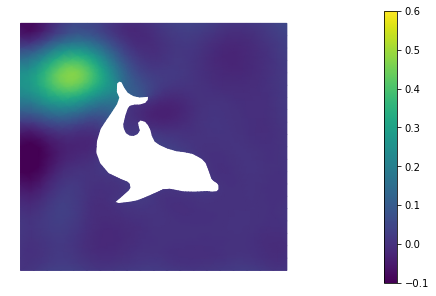

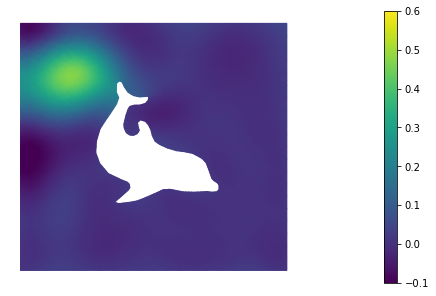

In [14]:
objs = [dl.Function(Vh,true_initial_condition_predicted_left_1)]
mytitles = ['']; nb.multi1_plot(objs, mytitles,vmin = -0.1, vmax = 0.5) 
plt.savefig('Dophin_LS_Nr_1_r_250.pdf')

objs = [dl.Function(Vh,true_initial_condition_predicted_left_2)]
mytitles = ['']; nb.multi1_plot(objs, mytitles,vmin = -0.1, vmax = 0.5)
plt.savefig('Dophin_LS_Nr_1_r_750.pdf')

objs = [dl.Function(Vh,true_initial_condition_predicted_left_3)]
mytitles = ['']; nb.multi1_plot(objs, mytitles,vmin = -0.1, vmax = 0.5)
plt.savefig('Dophin_LS_Nr_1_r_1500.pdf')

objs = [dl.Function(Vh,true_initial_condition_predicted_left_4)]
mytitles = ['']; nb.multi1_plot(objs, mytitles,vmin = -0.1, vmax = 0.5)
plt.savefig('Dophin_LS_Nr_10_r_250.pdf')

objs = [dl.Function(Vh,true_initial_condition_predicted_left_5)]
mytitles = ['']; nb.multi1_plot(objs, mytitles,vmin = -0.1, vmax = 0.5)
plt.savefig('Dophin_LS_Nr_10_r_750.pdf')

objs = [dl.Function(Vh,true_initial_condition_predicted_left_6)]
mytitles = ['']; nb.multi1_plot(objs, mytitles,vmin = -0.1, vmax = 0.5)
plt.savefig('Dophin_LS_Nr_10_r_1500.pdf')




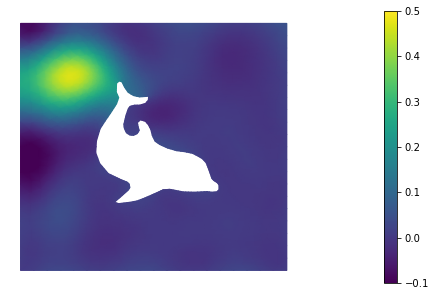

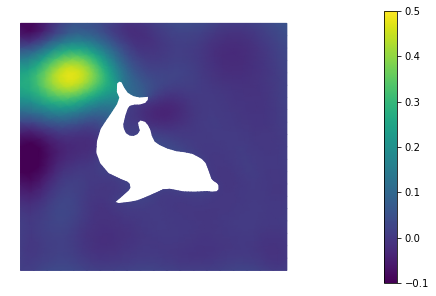

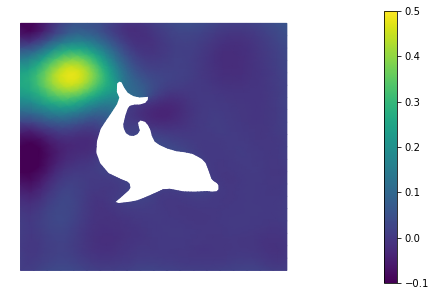

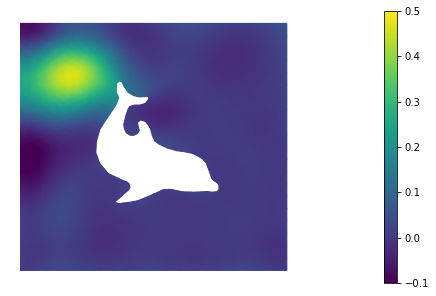

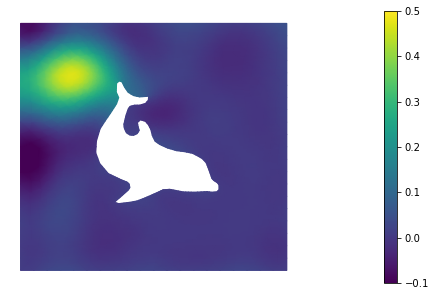

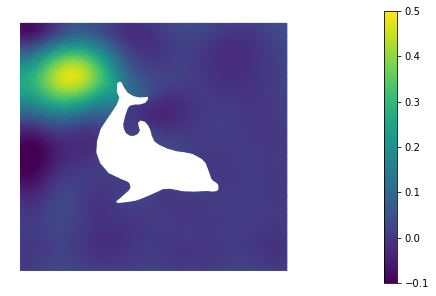

In [23]:
objs = [dl.Function(Vh,true_initial_condition_predicted_RAM_1)]
mytitles = ['']; nb.multi1_plot(objs, mytitles,vmin = -0.1, vmax = 0.5) 
plt.savefig('Dophin_RAM_Nr_1_r_250.pdf')

objs = [dl.Function(Vh,true_initial_condition_predicted_RAM_2)]
mytitles = ['']; nb.multi1_plot(objs, mytitles,vmin = -0.1, vmax = 0.5)
plt.savefig('Dophin_RAM_Nr_1_r_750.pdf')

objs = [dl.Function(Vh,true_initial_condition_predicted_RAM_3)]
mytitles = ['']; nb.multi1_plot(objs, mytitles,vmin = -0.1, vmax = 0.5)
plt.savefig('Dophin_RAM_Nr_1_r_1500.pdf')

objs = [dl.Function(Vh,true_initial_condition_predicted_RAM_4)]
mytitles = ['']; nb.multi1_plot(objs, mytitles,vmin = -0.1, vmax = 0.5)
plt.savefig('Dophin_RAM_Nr_10_r_250.pdf')

objs = [dl.Function(Vh,true_initial_condition_predicted_RAM_5)]
mytitles = ['']; nb.multi1_plot(objs, mytitles,vmin = -0.1, vmax = 0.5)
plt.savefig('Dophin_RAM_Nr_10_r_750.pdf')

objs = [dl.Function(Vh,true_initial_condition_predicted_RAM_6)]
mytitles = ['']; nb.multi1_plot(objs, mytitles,vmin = -0.1, vmax = 0.5)
plt.savefig('Dophin_RAM_Nr_10_r_1500.pdf')


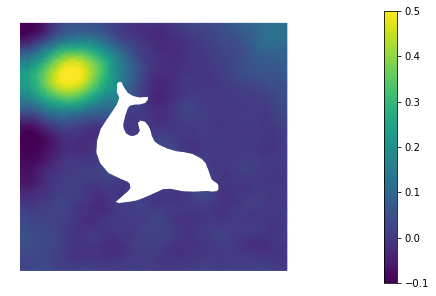

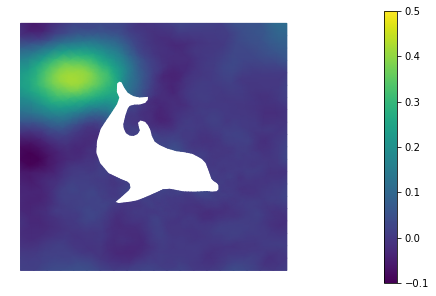

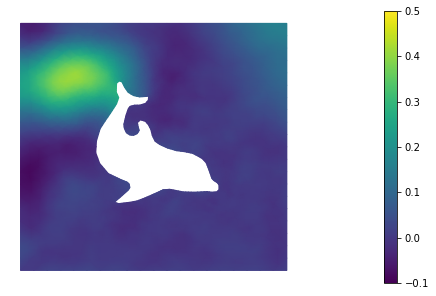

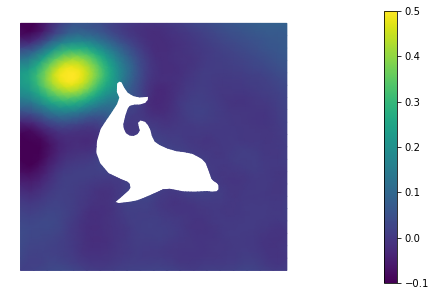

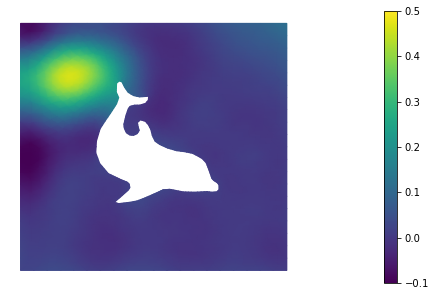

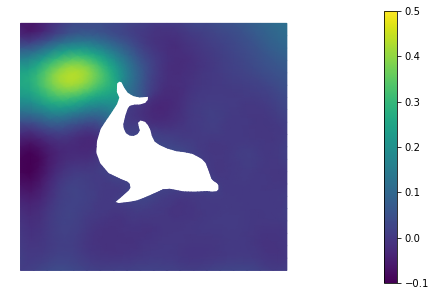

In [22]:
objs = [dl.Function(Vh,true_initial_condition_predicted_RIGHT_1)]
mytitles = ['']; nb.multi1_plot(objs, mytitles,vmin = -0.1, vmax = 0.5) 
plt.savefig('Dophin_RS_Nr_1_r_250.pdf')

objs = [dl.Function(Vh,true_initial_condition_predicted_RIGHT_2)]
mytitles = ['']; nb.multi1_plot(objs, mytitles,vmin = -0.1, vmax = 0.5)
plt.savefig('Dophin_RS_Nr_1_r_750.pdf')

objs = [dl.Function(Vh,true_initial_condition_predicted_RIGHT_3)]
mytitles = ['']; nb.multi1_plot(objs, mytitles,vmin = -0.1, vmax = 0.5)
plt.savefig('Dophin_RS_Nr_1_r_1500.pdf')

objs = [dl.Function(Vh,true_initial_condition_predicted_RIGHT_4)]
mytitles = ['']; nb.multi1_plot(objs, mytitles,vmin = -0.1, vmax = 0.5)
plt.savefig('Dophin_RS_Nr_10_r_250.pdf')

objs = [dl.Function(Vh,true_initial_condition_predicted_RIGHT_5)]
mytitles = ['']; nb.multi1_plot(objs, mytitles,vmin = -0.1, vmax = 0.5)
plt.savefig('Dophin_RS_Nr_10_r_750.pdf')

objs = [dl.Function(Vh,true_initial_condition_predicted_RIGHT_6)]
mytitles = ['']; nb.multi1_plot(objs, mytitles,vmin = -0.1, vmax = 0.5)
plt.savefig('Dophin_RS_Nr_10_r_1500.pdf')


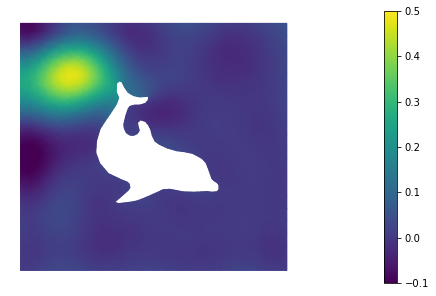

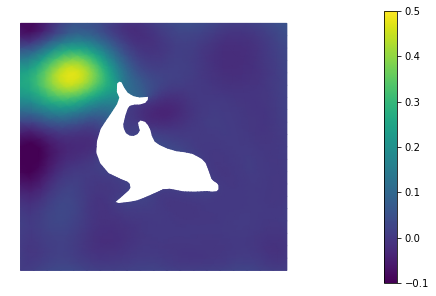

In [25]:
objs = [dl.Function(Vh,true_initial_condition_predicted_rMAP_1)]
mytitles = ['']; nb.multi1_plot(objs, mytitles,vmin = -0.1, vmax = 0.5) 
plt.savefig('Dophin_rMAP_N_500.pdf')

objs = [dl.Function(Vh,true_initial_condition_predicted_rMAP_2)]
mytitles = ['']; nb.multi1_plot(objs, mytitles,vmin = -0.1, vmax = 0.5)
plt.savefig('Dophin_rMAP_N_1000.pdf')

